# Unruh effect

For this work, I'll use as a reference the paper 'Synthetic Unruh effect in cold atoms' published in 2017 by J. Rodríguez-Laguna et. al. 

 The goal is to implement the Minkowsky and Rindler hamiltonians using QuTip, and then show a few plots to understand the behaviour of the system.

In [32]:
from functions import*

Define grid size, the number MUST BE AN ODD NUMBER (as explained in the paper). To obtain better results this number should be as big as your computer allows (51 in my case). However for the 1st plot it is advisable to reduce this number to ~11, to improve readability.

In [35]:
#2D grid with size Lx x Ly
Lx = 51
Ly = 51

Call function that creates Minkowsky's hamiltonian. All elements should be 1, corresponding to the tunneling parameter.

In [36]:
H_M_2D, H_M_coo=minkowsky_H(Lx, Ly)
H_M_2D

Quantum object: dims=[[2601], [2601]], shape=(2601, 2601), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.000000e+00+0.0000000e+00j -1.000000e+00-0.0000000e+00j
   0.000000e+00+0.0000000e+00j ...  0.000000e+00+0.0000000e+00j
   0.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j]
 [-1.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j
  -6.123234e-17-1.0000000e+00j ...  0.000000e+00+0.0000000e+00j
   0.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j]
 [ 0.000000e+00+0.0000000e+00j -6.123234e-17+1.0000000e+00j
   0.000000e+00+0.0000000e+00j ...  0.000000e+00+0.0000000e+00j
   0.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j]
 ...
 [ 0.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j
   0.000000e+00+0.0000000e+00j ...  0.000000e+00+0.0000000e+00j
   1.000000e+00+1.2246468e-16j  0.000000e+00+0.0000000e+00j]
 [ 0.000000e+00+0.0000000e+00j  0.000000e+00+0.0000000e+00j
   0.000000e+00+0.0000000e+00j ...  1.000000e+00-1.2246468e-16j
   0.000000e+00+0.000000

Call function that creates Rindler's hamiltonian. In contrast to Minkowsky's hamiltonian, this one has elements that decrease as we approach the center of the matrix (this is the event horizon).

In [37]:
H_R_2D, H_R_coo=rindler_H(Lx, Ly)
H_R_2D

Quantum object: dims=[[2601], [2601]], shape=(2601, 2601), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j  9.80392157e-01-0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 9.80392157e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   6.00317058e-17+9.80392157e-01j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  6.00317058e-17-9.80392157e-01j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   9.80392157e-01+1.20063412e-16j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000

Now let's plots the elements of the matrices in a colour map. To do so, we will take the magnitude of the elemts (since some of them are negative and complex). The plot shows how the Minkowsky matrix is full of ones, while the Rindler matrix has elements that decrease as we approach the center, where the event horizon is located.

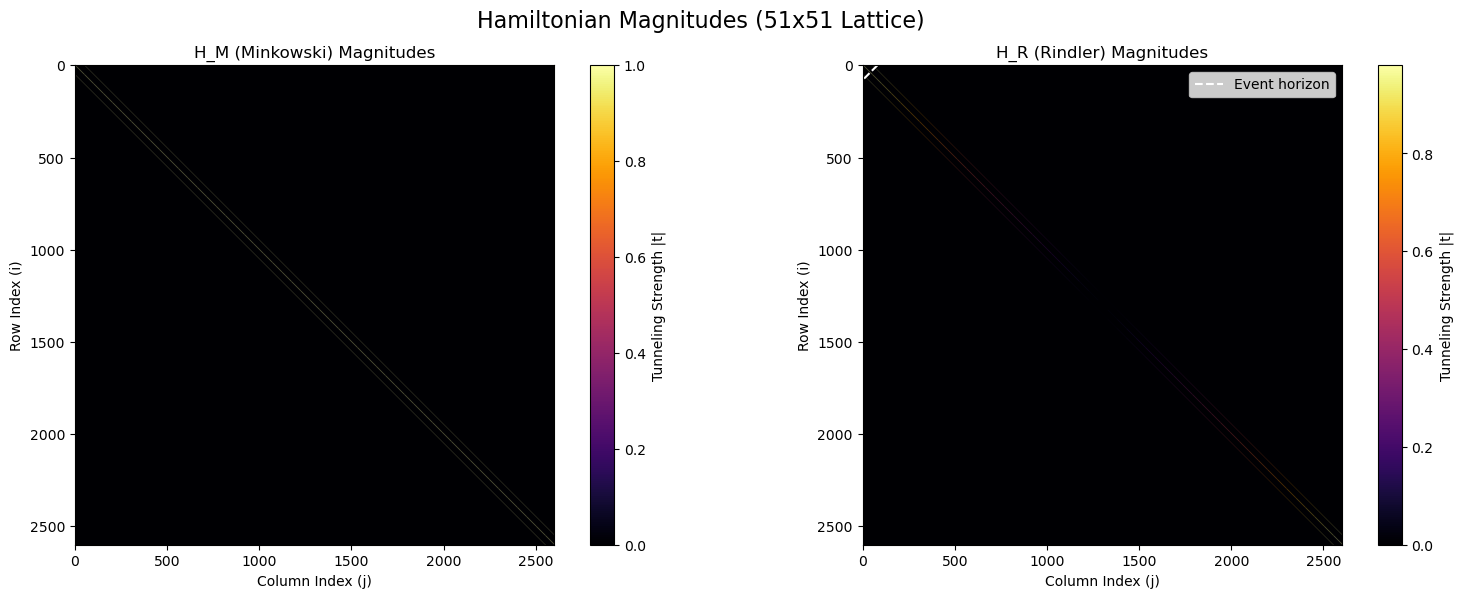

In [38]:
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f"Hamiltonian Magnitudes ({Lx}x{Ly} Lattice)", fontsize=16)

# --- Plot 1: H_M-----------------------------------------------------------------------------------------
# Convert to dense array and get magnitudes
H_M_dense = H_M_coo.toarray()
mags_M = np.abs(H_M_dense)

im1 = ax1.imshow(mags_M, cmap='inferno')
ax1.set_title("H_M (Minkowski) Magnitudes")
ax1.set_xlabel("Column Index (j)")
ax1.set_ylabel("Row Index (i)")
fig.colorbar(im1, ax=ax1, label="Tunneling Strength |t|")

# --- Plot 2: H_R------------------------------------------------------------------------------------------
# Convert to dense array and get magnitudes
H_R_dense = H_R_coo.toarray()
mags_R = np.abs(H_R_dense)

im2 = ax2.imshow(mags_R, cmap='inferno')
ax2.set_title("H_R (Rindler) Magnitudes")
ax2.set_xlabel("Column Index (j)")
ax2.set_ylabel("Row Index (i)")
ax2.plot([80,0],[0,80], linestyle='--', label='Event horizon', color='white')
ax2.legend(loc='upper right')
fig.colorbar(im2, ax=ax2, label="Tunneling Strength |t|")

plt.tight_layout()
plt.savefig('hamiltonian_magnitudes.pdf')
plt.show()

Now we want to observe the event horizon in action. For this purpose, we create a gaussian wavepacket that travels from the left towards the event horizon. In the Minkowsky's case, we should see the wave evolving naturally with time, since there is no event horizon. However in the second case (lower row) we should see that the wave can not make it past the horizon (similar to a black hole).

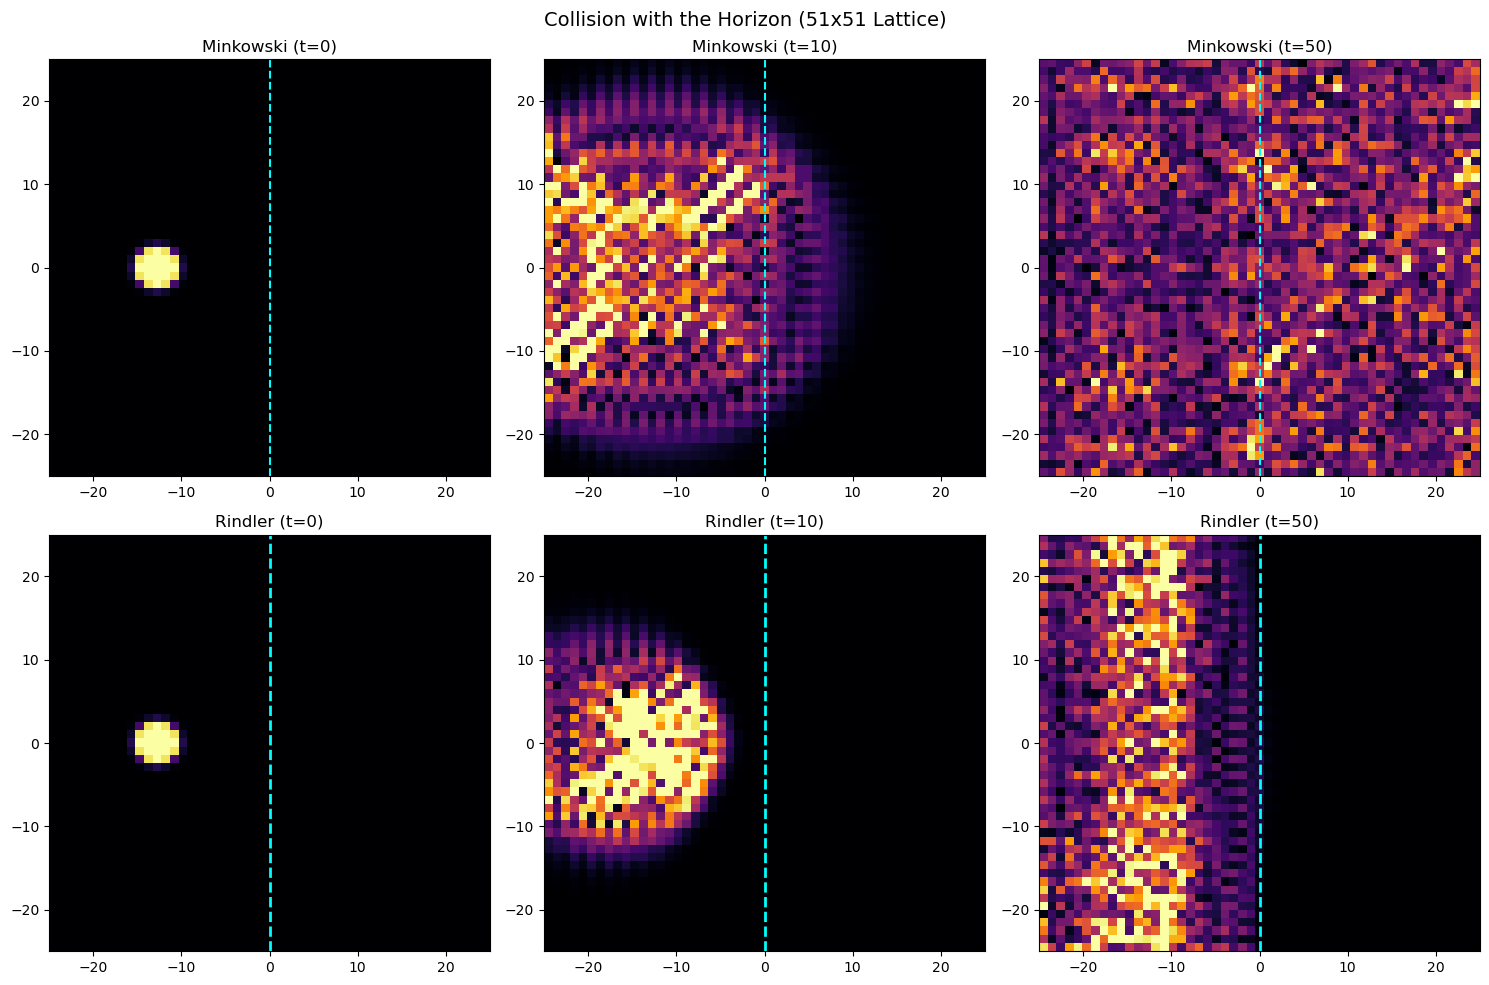

In [6]:
times=[0, 10, 50]
gaussian_event_horizon(Lx, Ly, times, H_M_2D, H_R_2D, True)

To make it cooler let's create an animated GIF of the evolution.

In [7]:
times=[0,10,50]
event_horizon_animation(Lx, Ly, times, H_M_2D, H_R_2D, True, True)

Now that we know the event horizon behaves as we expect, let's try to observe the Unruh effect. For this purpose, we want to compare the amount of particles that an observer sees in Minkwosky's and Rindler's vaccum. Near the event horizon, we expect to see a bigger density of particles for the Rindler's observer. This suggests that such observer 'sees' a higher temperature.

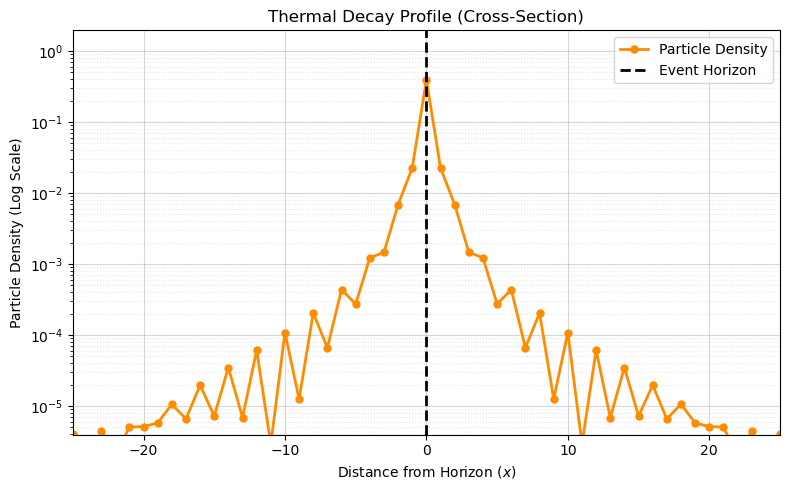

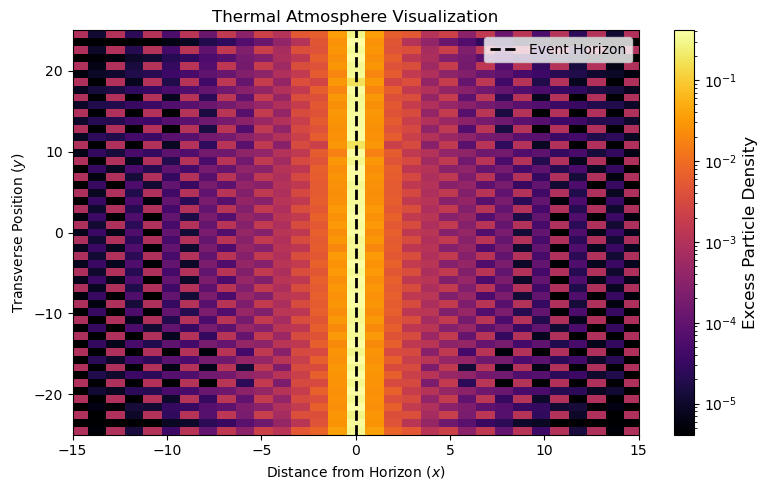

In [8]:
_ , atmosphere_2D=thermal_atmosphere(Lx, Ly, H_M_2D, H_R_2D)

plot_atmosphere_1D(atmosphere_2D, Lx, Ly, True)
plot_atmosphere_2D(atmosphere_2D, Lx, Ly, True)